In [1]:
#Working on applying Prophet to our datasets

#Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from prophet import Prophet



In [2]:
#Read in the data
df_utahpop = pd.read_csv('../utah population 2000-2022 neilsberg.csv')
df_utahpop.head()

#Analyze the data
display(df_utahpop.info())
display(df_utahpop.describe())
df_utahpop





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0                        24 non-null     object
 1   Population           23 non-null     object
 2   Year on Year Change  23 non-null     object
 3   Change in Percent    23 non-null     object
dtypes: object(4)
memory usage: 900.0+ bytes


None

,,Population,Year on Year Change,Change in Percent
count,24,23,23,23
unique,24,23,23,21
top,2000,"2,244,207",-,1.68%
freq,1,1,1,2


,,Population,Year on Year Change,Change in Percent
0,2000,"2,244,207",-,-
1,2001,"2,282,415","38,208",1.70%
2,2002,"2,322,002","39,587",1.73%
3,2003,"2,355,755","33,753",1.45%
4,2004,"2,395,448","39,693",1.68%
5,2005,"2,449,105","53,657",2.24%
6,2006,"2,513,861","64,756",2.64%
7,2007,"2,583,023","69,162",2.75%
8,2008,"2,644,846","61,823",2.39%
9,2009,"2,701,062","56,216",2.13%


In [3]:
#Transform/clean the data, if necessary

df_utahpop.rename(columns={' ':'Year'},inplace=True)
df_utahpop

df_utahpop.dropna(inplace=True)

df_utahpop.drop(df_utahpop.index[0], inplace=True)

#change column types to appropriate dtypes 

df_utahpop['Year'] = pd.to_datetime(df_utahpop['Year'], format='%Y')

columns_to_convert = ['Population', 'Year on Year Change']
for column in columns_to_convert:
    df_utahpop[column] = df_utahpop[column].str.replace(',', '').astype(int)

#set the index to the year column
df_utahpop.set_index('Year', inplace=True)

df_utahpop







,Population,Year on Year Change,Change in Percent
Year,,,
2001-01-01,2282415,38208,1.70%
2002-01-01,2322002,39587,1.73%
2003-01-01,2355755,33753,1.45%
2004-01-01,2395448,39693,1.68%
2005-01-01,2449105,53657,2.24%
2006-01-01,2513861,64756,2.64%
2007-01-01,2583023,69162,2.75%
2008-01-01,2644846,61823,2.39%
2009-01-01,2701062,56216,2.13%


array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object)

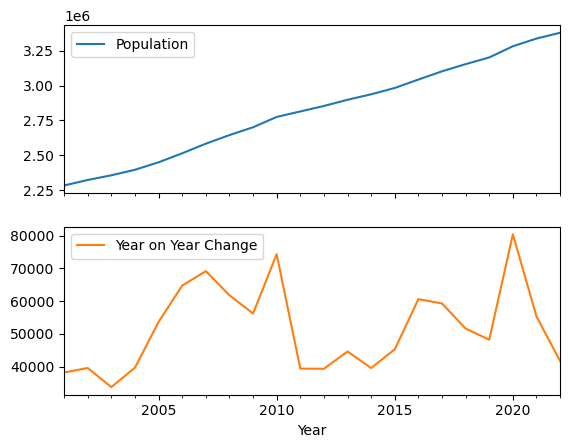

In [4]:
#Plot Dataframes
df_utahpop.plot(subplots=True)

In [5]:
#Prepare the data for Prophet
m = Prophet()
m
#Remove last two columns
df_utahpop = df_utahpop.iloc[:, :-2]
df_utahpop

df_utahpop.reset_index(inplace=True)
prepped_utahpop_df = df_utahpop.rename(columns={'Year': 'ds', 'Population':'y'})


#Train the model
m.fit(prepped_utahpop_df)



16:55:37 - cmdstanpy - INFO - Chain [1] start processing
16:55:37 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
#Make predictions

future_utahpop = m.make_future_dataframe(periods=5, freq="YS")
future_utahpop.tail(7)


,ds
20,2021-01-01
21,2022-01-01
22,2023-01-01
23,2024-01-01
24,2025-01-01
25,2026-01-01
26,2027-01-01


In [7]:
#Make the predictions
future_utahpop = m.predict(future_utahpop)
future_utahpop.tail(7)





,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
20,2021-01-01,1.336965e+06,3.325930e+06,3.337952e+06,1.336965e+06,1.336965e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,3.331848e+06
21,2022-01-01,1.394646e+06,3.381206e+06,3.392394e+06,1.394646e+06,1.394646e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,3.386706e+06
22,2023-01-01,1.452326e+06,3.438697e+06,3.451492e+06,1.449512e+06,1.455288e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,0.0,0.0,0.0,3.444922e+06
23,2024-01-01,1.510006e+06,3.495311e+06,3.517797e+06,1.500665e+06,1.519563e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,0.0,0.0,0.0,3.506605e+06
24,2025-01-01,1.567845e+06,3.544235e+06,3.580968e+06,1.549528e+06,1.585643e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,3.562727e+06
25,2026-01-01,1.625525e+06,3.589137e+06,3.644889e+06,1.598463e+06,1.652679e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,3.617585e+06
26,2027-01-01,1.683205e+06,3.636841e+06,3.713400e+06,1.643767e+06,1.721027e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,0.0,0.0,0.0,3.675802e+06


/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


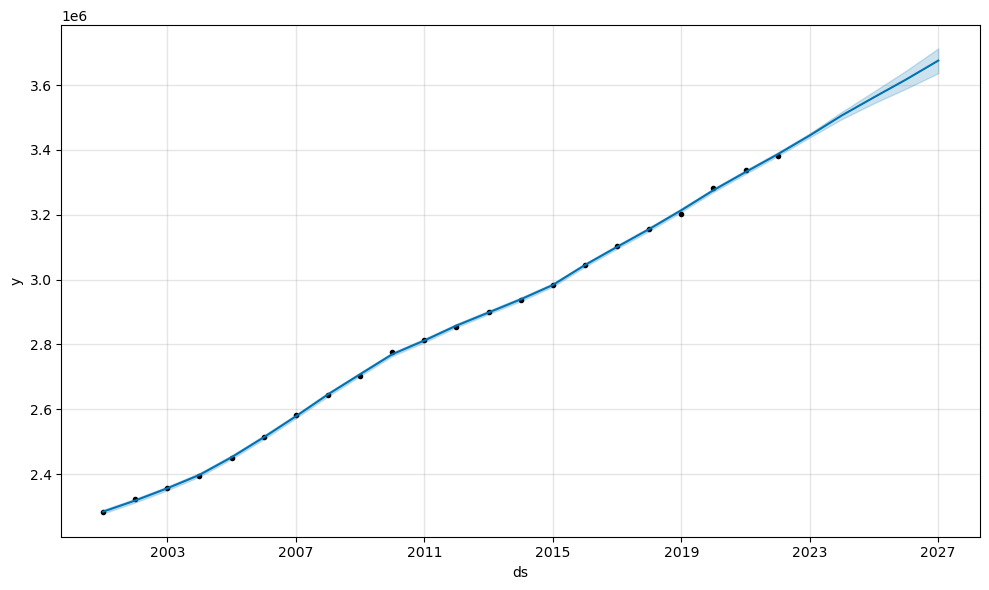

In [8]:
#Plot the predictions
fig1 = m.plot(future_utahpop)

/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

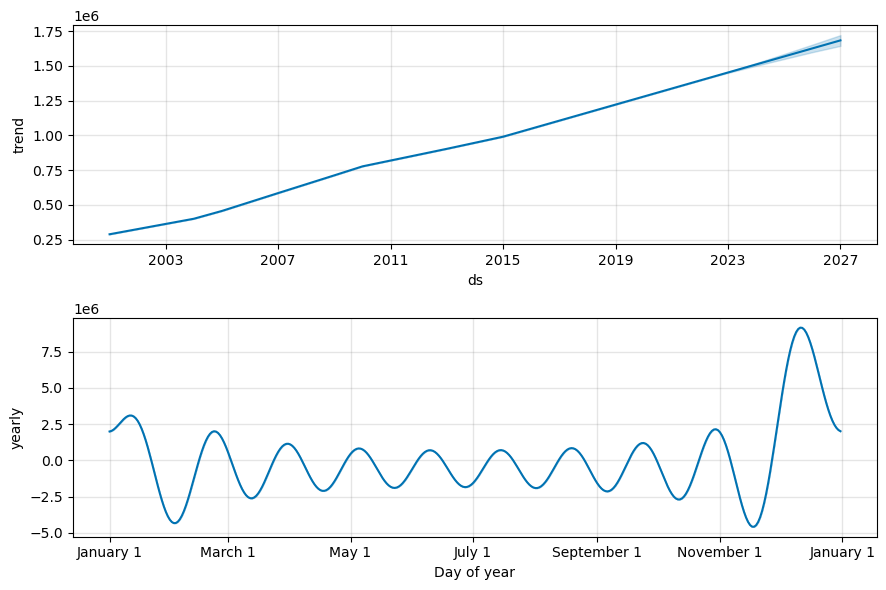

In [9]:
#Evaluate the model

fig2 = m.plot_components(future_utahpop)